**FORD CAR PRICE PREDICTION **

The aim of this project is to create a model that can forecast the fair market value of used cars based on a number of factors, such as mileage, manufacture year, fuel economy, transmission, road tax, fuel type and engine displacement. In car industry , this model can help manufacturers, buyers and sellers of automobiles. When it's done using tha data that people enter, it may produce a somewhat accurate price estimate. Machine learning is vital part of model development process. The dataset was taken from previous data record uploaded on kaggle platform. We used random forest regression for this project, but there are other regression techniques as well, such as decision tree, support vector, polynomial and linear regression.
In order to better comprehend the dataset, this study shows the data prior to actually beginning the model building process. To ensure the performance of the regression, the dataset was partitioned and altered to match the model. R-square was computed in order to assess each regression's performance.

**1. Problem Statement:**

The predict car prices by creating an effective and efficient model that uses user input to forecast used car prices.




**Proposed System Algorithm:**

In order to improve the dataset's predicted accuracy, as Random Forest is a classifier that applies several decision trees to various subsets of the given dataset and averages them. With the random forest, each decision tree's forecast is taken into consideration and the result are based on the predictions.
Where as predictions are made by majority voting, and the outcome is predicted. We employ random selections of data and features to create a forest of decision trees, or many trees, which is why it is termed a random forest.

Random Forest is an example of a bagging method, where each model uses many subsets of data to generate predictions.

**Steps:**
1. Collection of Data
2. Preprocessing of the data
3. Splitting of the data
4. Choosing the count of trees
5. Choosing the maximum depth of trees
6. Choosing the number of features to consider
7. Fitting of the model
8. Evaluation of the model
9. Validating the model


Equation:
The equation for random forest equation is a bit more complex than for more of the other models, as it involves multiple decision trees working together.
     
    y = Σ(j=1 to J) fj(x)
where:

* y is the predicted value of the response variable.

* J is the total number of trees in the random forest model.

* fj(x) is the predicted value of the jth decision tree for the given set of predictor variables(features) x


**DATA COLLECTION:**
The data has been collected from kaggle platform.(https://www.kaggle.com/datasets/aditya6899/usa-cars-dataset)

In [21]:
# libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model


In [3]:
df = pd.read_csv("/content/USA_cars_datasets.csv")
df

,Unnamed: 0,price,brand,model,year,title_status,mileage,color,vin,lot,state,country,condition
0,0,6300,toyota,cruiser,2008,clean vehicle,274117.0,black,jtezu11f88k007763,159348797,new jersey,usa,10 days left
1,1,2899,ford,se,2011,clean vehicle,190552.0,silver,2fmdk3gc4bbb02217,166951262,tennessee,usa,6 days left
2,2,5350,dodge,mpv,2018,clean vehicle,39590.0,silver,3c4pdcgg5jt346413,167655728,georgia,usa,2 days left
3,3,25000,ford,door,2014,clean vehicle,64146.0,blue,1ftfw1et4efc23745,167753855,virginia,usa,22 hours left
4,4,27700,chevrolet,1500,2018,clean vehicle,6654.0,red,3gcpcrec2jg473991,167763266,florida,usa,22 hours left
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,2494,7800,nissan,versa,2019,clean vehicle,23609.0,red,3n1cn7ap9kl880319,167722715,california,usa,1 days left
2495,2495,9200,nissan,versa,2018,clean vehicle,34553.0,silver,3n1cn7ap5jl884088,167762225,florida,usa,21 hours left
2496,2496,9200,nissan,versa,2018,clean vehicle,31594.0,silver,3n1cn7ap9jl884191,167762226,florida,usa,21 hours left
2497,2497,9200,nissan,versa,2018,clean vehicle,32557.0,black,3n1cn7ap3jl883263,167762227,florida,usa,2 days left


2. **DATA EXPLORATION:**

**Characteristics:**


*   **Data Quality Issues:** Check for missing values, outliers and inconsistent data.
*   **Imbalanced Dataset:** To have an imbalanced dataset in price predection.
*  **Evaluation Metrics:** For imbalanced datasets, metrics for more appropriate accuracy.







In [6]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    2499 non-null   int64  
 1   price         2499 non-null   int64  
 2   brand         2499 non-null   object 
 3   model         2499 non-null   object 
 4   year          2499 non-null   int64  
 5   title_status  2499 non-null   object 
 6   mileage       2499 non-null   float64
 7   color         2499 non-null   object 
 8   vin           2499 non-null   object 
 9   lot           2499 non-null   int64  
 10  state         2499 non-null   object 
 11  country       2499 non-null   object 
 12  condition     2499 non-null   object 
dtypes: float64(1), int64(4), object(8)
memory usage: 253.9+ KB


**DATA PREPROCESSING:**


*   **Missing Values:** Handle missing values by imputing with mean/mode values.
*   **Outliners:** Identify and handle outliers.




In [7]:
df = df.drop(["condition","vin","Unnamed: 0","lot","country","title_status","color"], axis = 1)
df

,price,brand,model,year,mileage,state
0,6300,toyota,cruiser,2008,274117.0,new jersey
1,2899,ford,se,2011,190552.0,tennessee
2,5350,dodge,mpv,2018,39590.0,georgia
3,25000,ford,door,2014,64146.0,virginia
4,27700,chevrolet,1500,2018,6654.0,florida
...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,23609.0,california
2495,9200,nissan,versa,2018,34553.0,florida
2496,9200,nissan,versa,2018,31594.0,florida
2497,9200,nissan,versa,2018,32557.0,florida


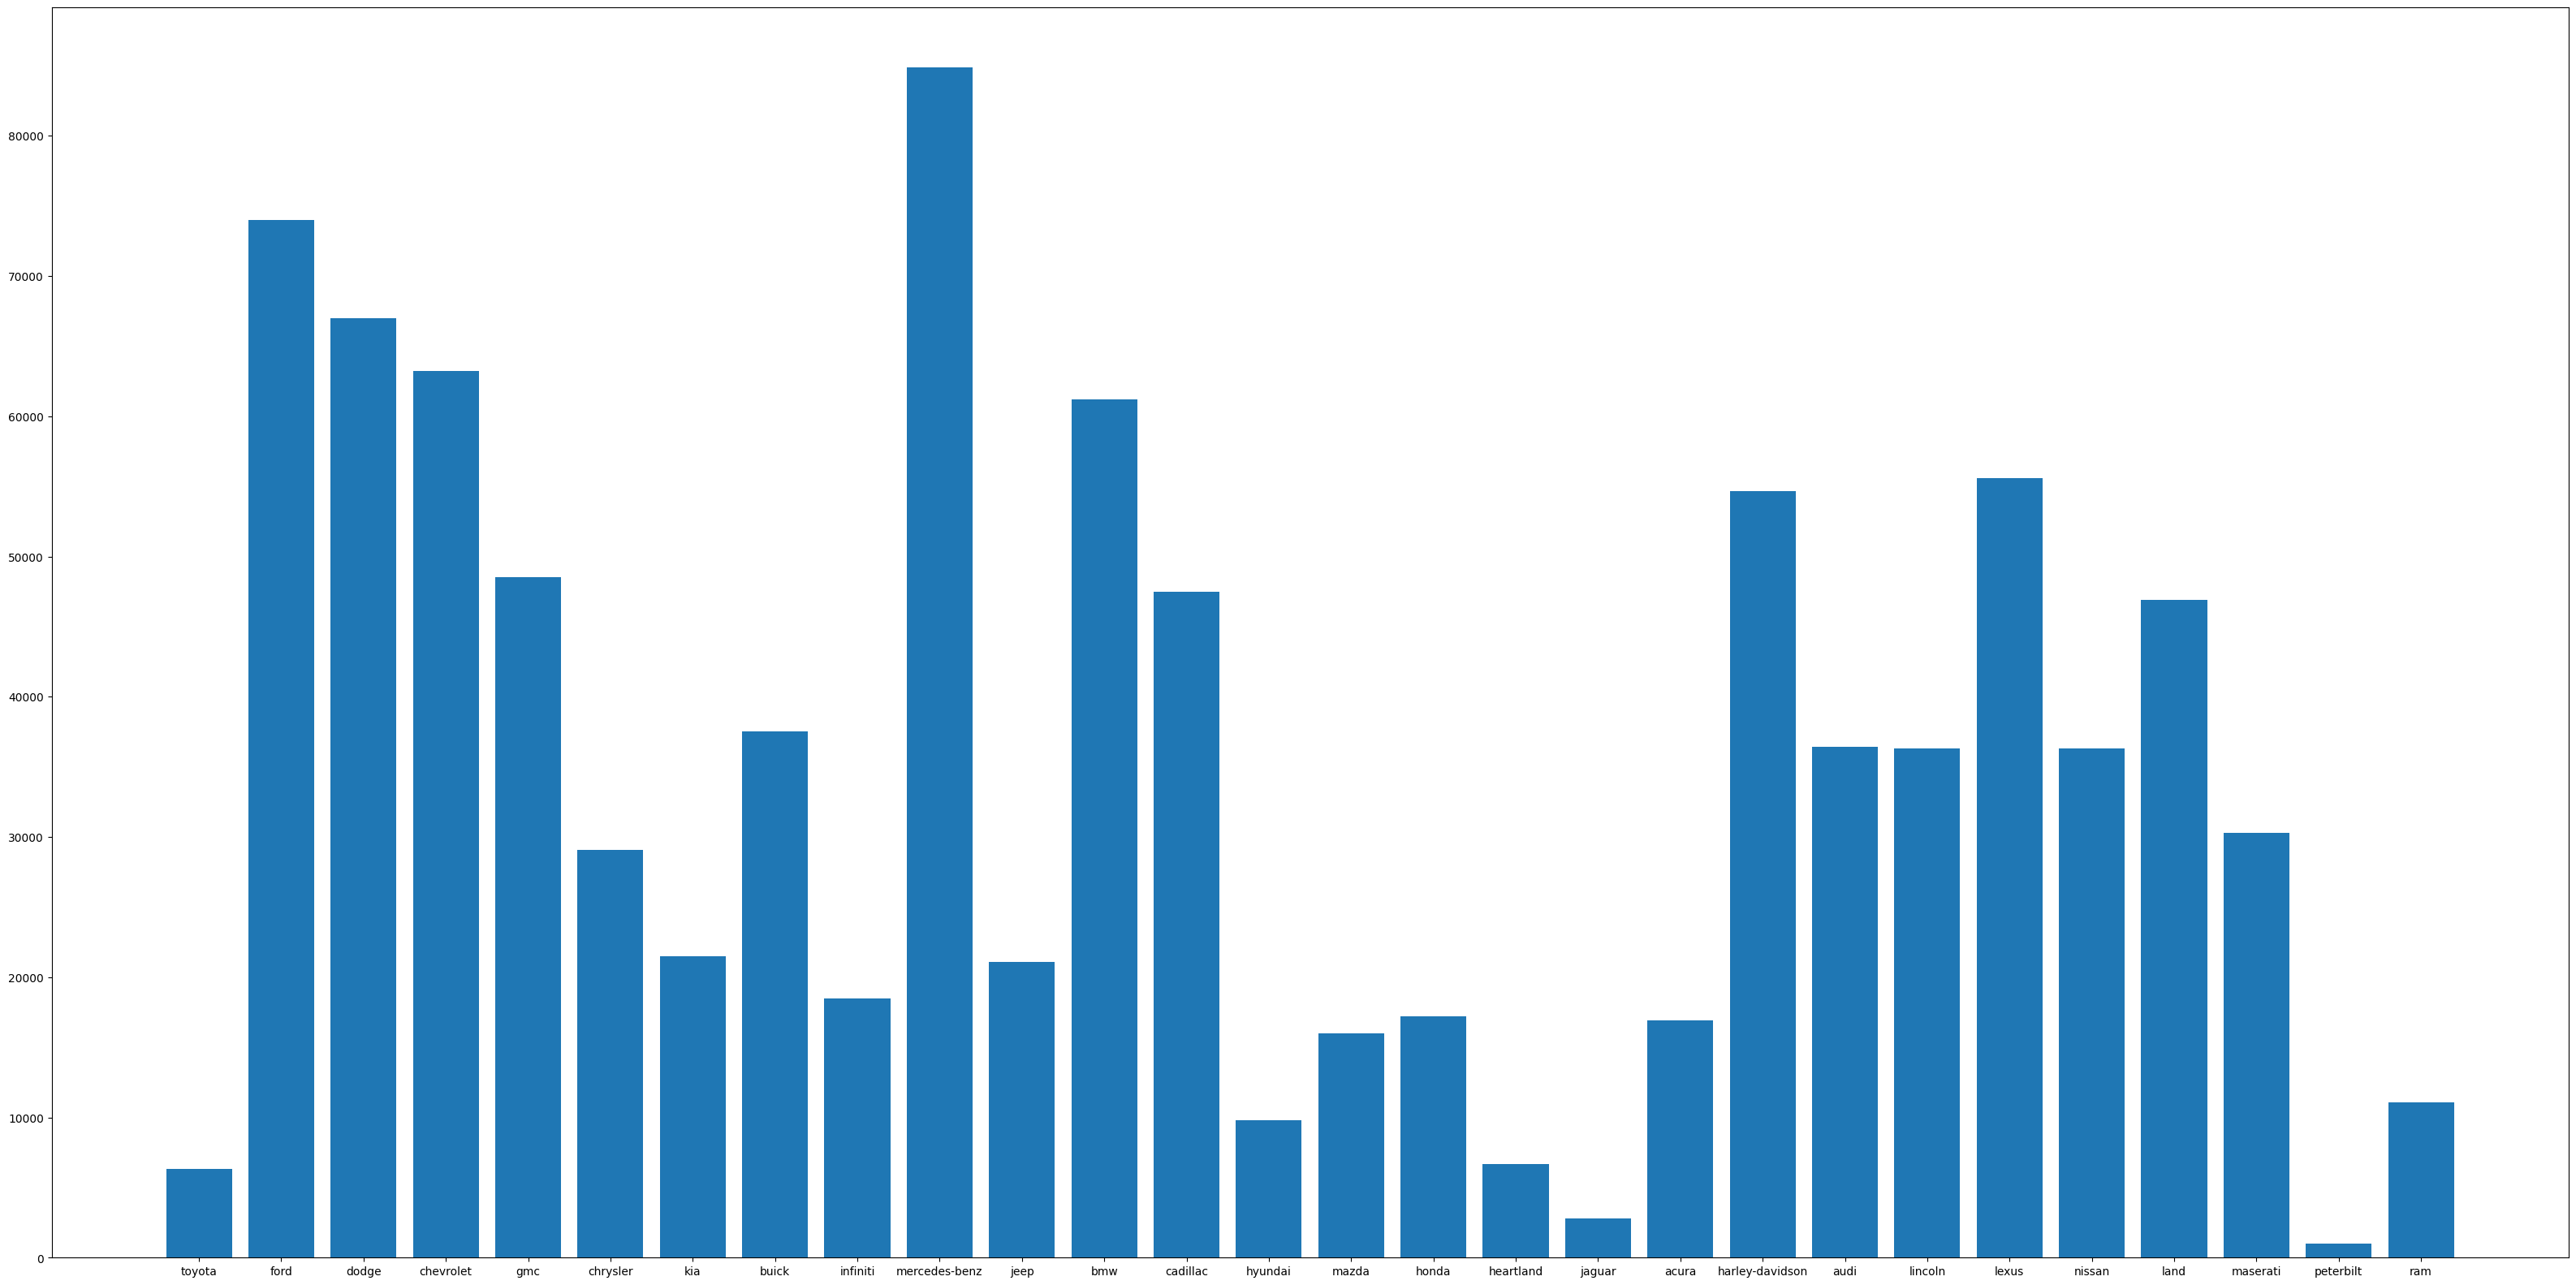

In [10]:
#graphical comparison presentation
plt.figure(figsize = (40,20))
plt.bar(df["brand"],df["price"])
plt.show()

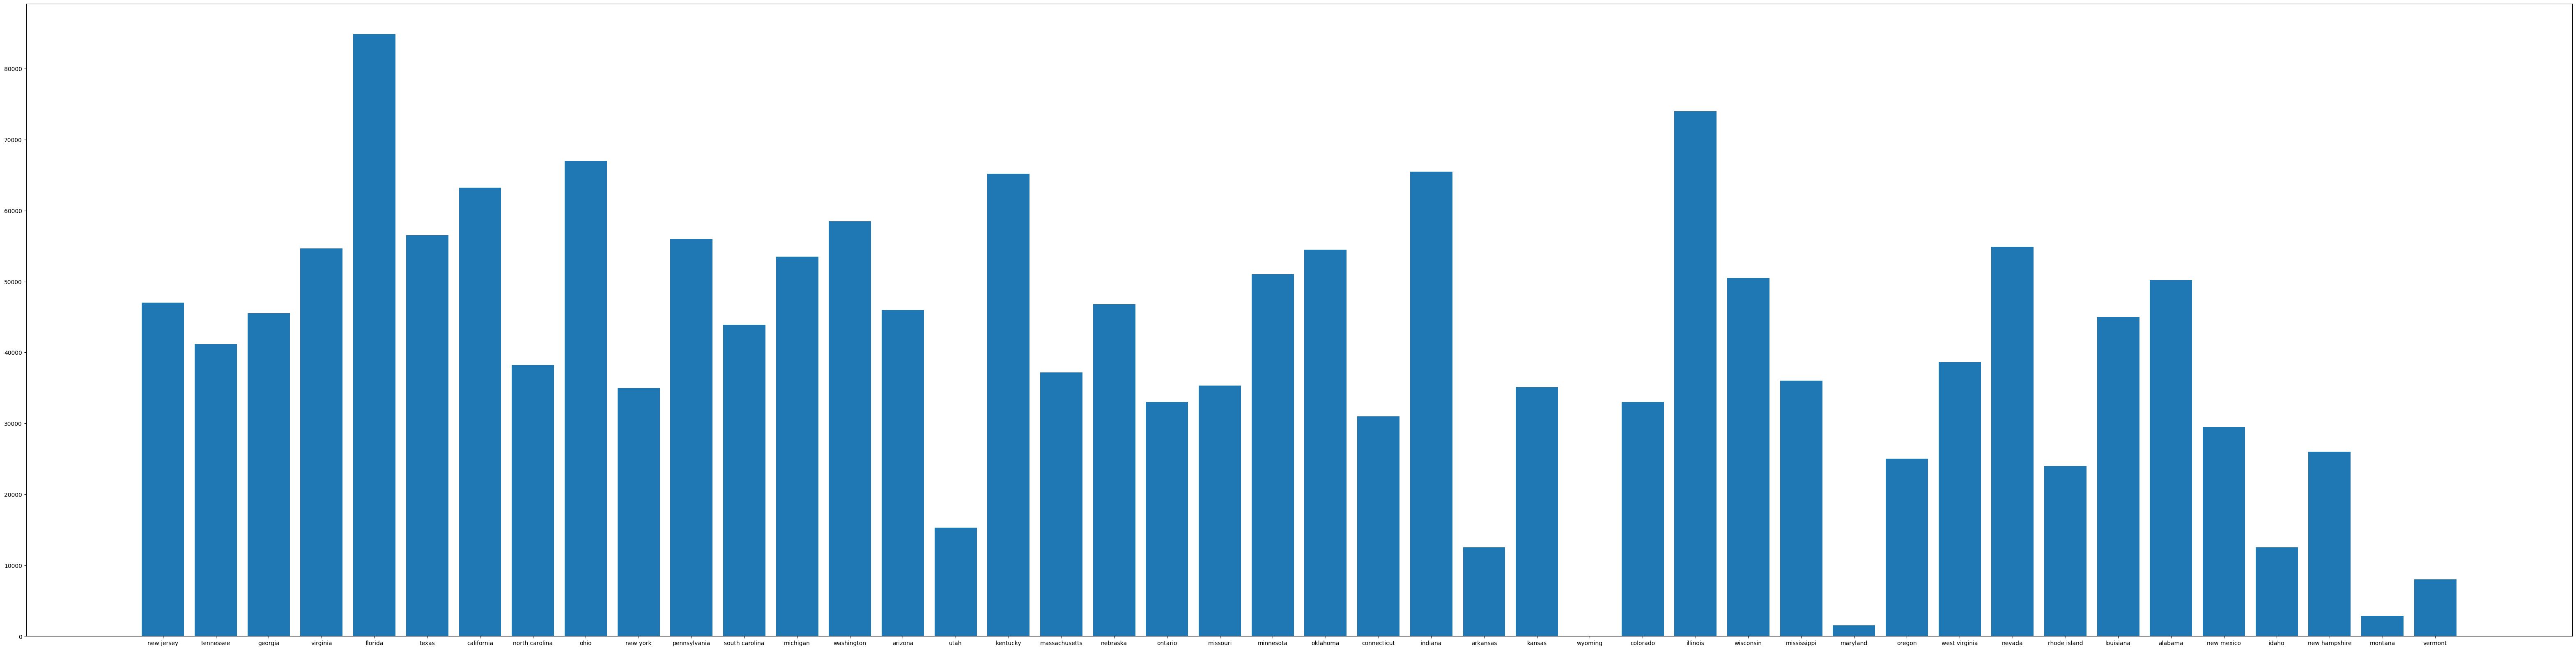

In [11]:
plt.figure(figsize = (80,20))
plt.bar(df["state"],df["price"])
plt.show()


In [13]:
brand = []
state = []
brand = df["brand"].value_counts()
state = df["state"].value_counts()
print(brand)
print()
print(state)

brand
ford               1235
dodge               432
nissan              312
chevrolet           297
gmc                  42
jeep                 30
chrysler             18
bmw                  17
hyundai              15
kia                  13
buick                13
infiniti             12
honda                12
cadillac             10
mercedes-benz        10
heartland             5
land                  4
peterbilt             4
audi                  4
acura                 3
lincoln               2
lexus                 2
mazda                 2
maserati              1
toyota                1
harley-davidson       1
jaguar                1
ram                   1
Name: count, dtype: int64

state
pennsylvania      299
florida           246
texas             214
california        190
michigan          169
north carolina    146
minnesota         119
illinois          113
wisconsin          94
virginia           90
new jersey         87
nevada             85
oklahoma           71
sou

In [14]:
df

,price,brand,model,year,mileage,state
0,6300,toyota,cruiser,2008,274117.0,new jersey
1,2899,ford,se,2011,190552.0,tennessee
2,5350,dodge,mpv,2018,39590.0,georgia
3,25000,ford,door,2014,64146.0,virginia
4,27700,chevrolet,1500,2018,6654.0,florida
...,...,...,...,...,...,...
2494,7800,nissan,versa,2019,23609.0,california
2495,9200,nissan,versa,2018,34553.0,florida
2496,9200,nissan,versa,2018,31594.0,florida
2497,9200,nissan,versa,2018,32557.0,florida


In [15]:
# Encode categorical variables
from sklearn.preprocessing import OneHotEncoder
df = pd.get_dummies(df, columns = ["brand","state","model"])
df.head()

,price,year,mileage,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,model_van,model_vans,model_vehicl,model_versa,model_volt,model_wagon,model_x3,model_xd,model_xt5,model_xterra
0,6300,2008,274117.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2899,2011,190552.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5350,2018,39590.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,25000,2014,64146.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,27700,2018,6654.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
x = df.drop(["price"], axis = 1)
y = df["price"]
df

,price,year,mileage,brand_acura,brand_audi,brand_bmw,brand_buick,brand_cadillac,brand_chevrolet,brand_chrysler,...,model_van,model_vans,model_vehicl,model_versa,model_volt,model_wagon,model_x3,model_xd,model_xt5,model_xterra
0,6300,2008,274117.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2899,2011,190552.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,5350,2018,39590.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,25000,2014,64146.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,27700,2018,6654.0,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,7800,2019,23609.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2495,9200,2018,34553.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2496,9200,2018,31594.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2497,9200,2018,32557.0,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [17]:
# split the data into train and test data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)


Random Forest Regressor

In [23]:
# Initialize Random Forest Classifier
from sklearn.ensemble import RandomForestRegressor
Fork = RandomForestRegressor()

In [24]:
# Prediction
Fork.fit(x_train, y_train)
y_pred = Fork.predict(x_test)

In [25]:
# Model Evaluation
from sklearn.metrics import r2_score
print("R2 score:",r2_score(y_true=y_test, y_pred=y_pred))

from sklearn.metrics import mean_squared_error
print("Mean Squared Error:",mean_squared_error(y_test, y_pred))

print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred)))


R2 score: 0.6773482951831387
Mean Squared Error: 45123283.5355752
RMSE: 6717.386659674668


5. **MODEL ASSESSMENT AND FINAL DISCUSSION**

**Overall Pipeline Discussion:**
The pipeline successfully addressed the problem of used car price detection for the Fork Company by machine learning techniques.

**Strengths and Limitations**

**Strength:**

*   Comprehensive data preprocessing and feature engineering.
*   Tuned Random Forest model that can capture non-linear relationships.

**Limitations:**


*   Assumes that the data is representative of the car price.
*   Assumes that past behavior is a good predictor of future car price.

**Model Explainability:**
Random Forest models, although not the most interpretable, offer feature importances that can give insight into which features are the most influential in predicting price.





**CONCLUSION**

Therefore, used cars for sale are rising globally due to rising new car prices and consumers inability to afford them. A system that efficiently assess an car worthiness based on a range of factors in thus desperately needed for used car pricing prediction. The pipeline will estimating used car prices with accuracy R2 score.

**References:**
1. Canvas Class Module shared Material.
2. Gegic, E., Isakovic, B., Keco, D., Masetic, Z. and Kevric, J., 2019. Car price prediction using machine learning techniques. TEM Journal, 8(1), p.113.
3. Pudaruth, S., 2014. Predicting the price of used cars using machine learning techniques. Int. J. Inf. Comput. Technol, 4(7), pp.753-764.
